In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [2]:
bp = pd.read_excel(r'./../data/20220405/bp_20220405.xlsx')
for i, (ID, subdf) in enumerate(bp.groupby('userID'), 1):
    locals()[f'bp{ID}'] = subdf

In [3]:
data = bp14487.sort_values(by='recordTime')
data = data.reset_index().drop('index',axis=1)
data = data.drop(['userID','diastolic','pulse','notes','deviceID','unit'],axis =1)

In [4]:
data = data[['recordTime','systolic']]


In [5]:
first_date = data.recordTime.loc[0]
date_diff_list = []
for i in range(len(data)):
    date_diff = data.recordTime.loc[i]-first_date
    date_diff_list.append(date_diff.days)
data['X']=date_diff_list

Text(0.5, 0, 'Date')

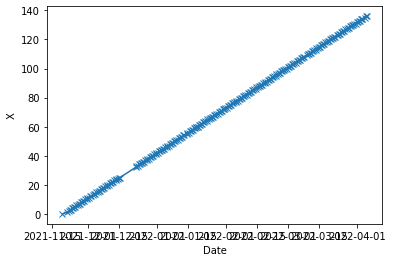

In [6]:
plt.plot(data.recordTime,data['X'],marker='x')
plt.ylabel('X')
plt.xlabel('Date')

In [7]:
kernel = 1.0 * RBF() + WhiteKernel()
X = np.array(data.X).reshape(-1,1)
gpr = GaussianProcessRegressor(kernel=kernel).fit(X, data.systolic)

In [8]:
X = np.array(data.X).reshape(-1,1)
mean_value,std_value = gpr.predict(X,return_std=True)

In [9]:
mean_data = pd.DataFrame(mean_value)
var_data = pd.DataFrame(std_value)

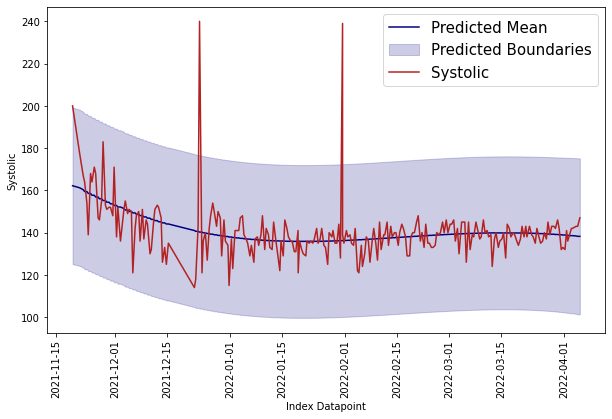

In [10]:
X = np.array(data.recordTime)
plt.figure(figsize=(10, 6))
plt.plot(X,mean_value,color='navy',label='Predicted Mean')
plt.fill_between(X,mean_value-3.00*std_value,mean_value+3.00*std_value,color='navy',alpha=0.2,label='Predicted Boundaries')
plt.plot(X,data.systolic,color='firebrick',label='Systolic')
plt.xlabel('Index Datapoint')
plt.ylabel('Systolic')
plt.xticks(rotation=90)
plt.legend(fontsize=15)

In [11]:
pred_data = data
pred_data['GPR Mean'] = mean_data
pred_data['GPR Upper Boundary']= mean_data+3.00*var_data
pred_data['GPR Lower Boundary']= mean_data-3.00*var_data
pred_data.head()

,recordTime,systolic,X,GPR Mean,GPR Upper Boundary,GPR Lower Boundary
0,2021-11-19 11:31:45,200,0,162.187028,199.236902,125.137154
1,2021-11-21 08:18:00,178,1,161.253959,198.198567,124.309352
2,2021-11-22 08:17:00,167,2,160.337828,197.187662,123.487994
3,2021-11-22 17:34:00,164,3,159.438760,196.203554,122.673967
4,2021-11-23 08:17:00,154,3,159.438760,196.203554,122.673967


In [12]:
outlier = []
for i in range(len(pred_data)):
    o = "Non Outlier"
    if pred_data['systolic'].loc[i]<=pred_data['GPR Upper Boundary'].loc[i] and pred_data['systolic'].loc[i]>=pred_data['GPR Lower Boundary'].loc[i]:
        True
    else:
        o="Outlier"
    outlier.append(o)

In [13]:
pred_data['Outlier']=outlier


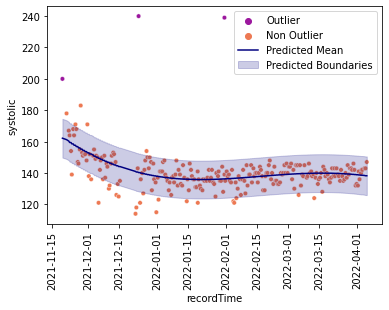

In [14]:
sns.scatterplot(x=pred_data.recordTime,y=pred_data.systolic,hue=pred_data.Outlier,palette='plasma',s=20)
X = np.array(data.recordTime)
plt.plot(X,mean_value,color='navy',label='Predicted Mean')
plt.fill_between(X,mean_value-1.00*std_value,mean_value+1.00*std_value,color='navy',alpha=0.2,label='Predicted Boundaries')
plt.xticks(rotation=90)
plt.legend()


In [15]:
pred_data[pred_data['Outlier']=='Outlier']


,recordTime,systolic,X,GPR Mean,GPR Upper Boundary,GPR Lower Boundary,Outlier
0,2021-11-19 11:31:45,200,0,162.187028,199.236902,125.137154,Outlier
51,2021-12-23 17:14:00,240,34,140.260983,176.474668,104.047298,Outlier
129,2022-01-31 06:56:00,239,72,136.220159,172.361230,100.079087,Outlier


In [16]:
outlier_spec = []
for i in range(len(pred_data)):
    o = "Non Outlier"
    if pred_data['systolic'].loc[i]>=pred_data['GPR Upper Boundary'].loc[i]:
        o = "Upper Outlier"
    if pred_data['systolic'].loc[i]<=pred_data['GPR Lower Boundary'].loc[i]:
        o = "Lower Outlier"
    else:
        True
    outlier_spec.append(o)
pred_data['Outlier Type'] = outlier_spec

https://towardsdatascience.com/hands-on-unsupervised-outlier-detection-using-machine-learning-with-python-ec599fe5a6b5

In [17]:
data = bp14487.sort_values(by='recordTime')
data = data.reset_index().drop('index',axis=1)
data = data.drop(['userID','systolic','pulse','notes','deviceID','unit'],axis =1)

In [18]:
data = data[['recordTime','diastolic']]


In [19]:
first_date = data.recordTime.loc[0]
date_diff_list = []
for i in range(len(data)):
    date_diff = data.recordTime.loc[i]-first_date
    date_diff_list.append(date_diff.days)
data['X']=date_diff_list

Text(0.5, 0, 'Date')

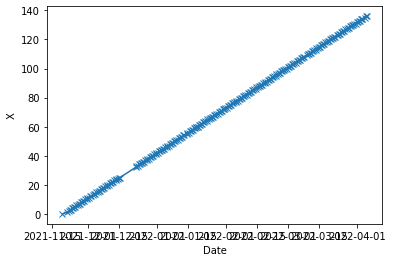

In [20]:
plt.plot(data.recordTime,data['X'],marker='x')
plt.ylabel('X')
plt.xlabel('Date')

In [21]:
kernel = 1.0 * RBF() + WhiteKernel()
X = np.array(data.X).reshape(-1,1)
gpr = GaussianProcessRegressor(kernel=kernel).fit(X, data.diastolic)

In [22]:
X = np.array(data.X).reshape(-1,1)
mean_value,std_value = gpr.predict(X,return_std=True)

In [23]:
mean_data = pd.DataFrame(mean_value)
var_data = pd.DataFrame(std_value)

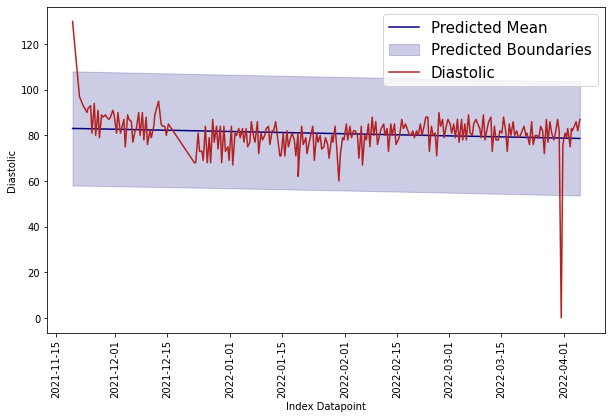

In [24]:
X = np.array(data.recordTime)
plt.figure(figsize=(10, 6))
plt.plot(X,mean_value,color='navy',label='Predicted Mean')
plt.fill_between(X,mean_value-3.00*std_value,mean_value+3.00*std_value,color='navy',alpha=0.2,label='Predicted Boundaries')
plt.plot(X,data.diastolic,color='firebrick',label='Diastolic')
plt.xlabel('Index Datapoint')
plt.ylabel('Diastolic')
plt.xticks(rotation=90)
plt.legend(fontsize=15)

In [25]:
pred_data = data
pred_data['GPR Mean'] = mean_data
pred_data['GPR Upper Boundary']= mean_data+3.00*var_data
pred_data['GPR Lower Boundary']= mean_data-3.00*var_data
pred_data.head()

,recordTime,diastolic,X,GPR Mean,GPR Upper Boundary,GPR Lower Boundary
0,2021-11-19 11:31:45,130,0,83.041641,108.063932,58.019350
1,2021-11-21 08:18:00,97,1,83.010052,108.028504,57.991600
2,2021-11-22 08:17:00,93,2,82.978453,107.993120,57.963786
3,2021-11-22 17:34:00,92,3,82.946844,107.957780,57.935907
4,2021-11-23 08:17:00,90,3,82.946844,107.957780,57.935907


In [26]:
outlier = []
for i in range(len(pred_data)):
    o = "Non Outlier"
    if pred_data['diastolic'].loc[i]<=pred_data['GPR Upper Boundary'].loc[i] and pred_data['diastolic'].loc[i]>=pred_data['GPR Lower Boundary'].loc[i]:
        True
    else:
        o="Outlier"
    outlier.append(o)

In [27]:
pred_data['Outlier']=outlier


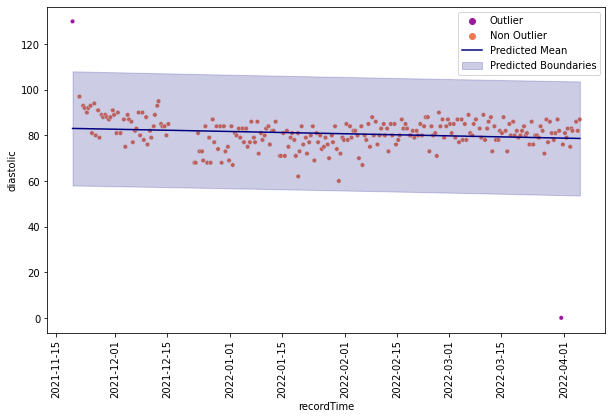

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_data.recordTime,y=pred_data.diastolic,hue=pred_data.Outlier,palette='plasma',s=20)
X = np.array(data.recordTime)
plt.plot(X,mean_value,color='navy',label='Predicted Mean')
plt.fill_between(X,mean_value-3.00*std_value,mean_value+3.00*std_value,color='navy',alpha=0.2,label='Predicted Boundaries')
plt.xticks(rotation=90)
plt.legend()


In [29]:
pred_data[pred_data['Outlier']=='Outlier']


,recordTime,diastolic,X,GPR Mean,GPR Upper Boundary,GPR Lower Boundary,Outlier
0,2021-11-19 11:31:45,130,0,83.041641,108.063932,58.019350,Outlier
247,2022-03-31 06:10:00,0,131,78.818138,103.802452,53.833824,Outlier


Pulse

In [30]:
data = bp14487.sort_values(by='recordTime')
data = data.reset_index().drop('index',axis=1)
data = data.drop(['userID','systolic','diastolic','notes','deviceID','unit'],axis =1)

In [31]:
data = data[['recordTime','pulse']]


In [32]:
first_date = data.recordTime.loc[0]
date_diff_list = []
for i in range(len(data)):
    date_diff = data.recordTime.loc[i]-first_date
    date_diff_list.append(date_diff.days)
data['X']=date_diff_list

Text(0.5, 0, 'Date')

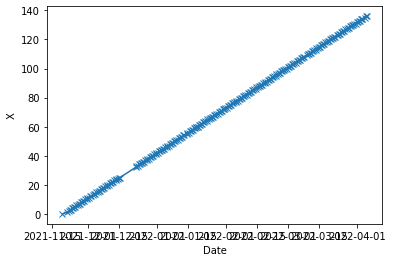

In [33]:
plt.plot(data.recordTime,data['X'],marker='x')
plt.ylabel('X')
plt.xlabel('Date')

In [34]:
kernel = 1.0 * RBF() + WhiteKernel()
X = np.array(data.X).reshape(-1,1)
gpr = GaussianProcessRegressor(kernel=kernel).fit(X, data.pulse)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [35]:
X = np.array(data.X).reshape(-1,1)
mean_value,std_value = gpr.predict(X,return_std=True)

In [36]:
mean_data = pd.DataFrame(mean_value)
var_data = pd.DataFrame(std_value)

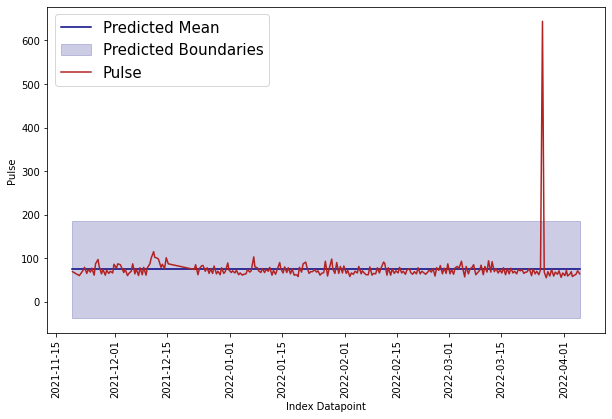

In [37]:
X = np.array(data.recordTime)
plt.figure(figsize=(10, 6))
plt.plot(X,mean_value,color='navy',label='Predicted Mean')
plt.fill_between(X,mean_value-3.00*std_value,mean_value+3.00*std_value,color='navy',alpha=0.2,label='Predicted Boundaries')
plt.plot(X,data.pulse,color='firebrick',label='Pulse')
plt.xlabel('Index Datapoint')
plt.ylabel('Pulse')
plt.xticks(rotation=90)
plt.legend(fontsize=15)

In [38]:
pred_data = data
pred_data['GPR Mean'] = mean_data
pred_data['GPR Upper Boundary']= mean_data+3.00*var_data
pred_data['GPR Lower Boundary']= mean_data-3.00*var_data
pred_data.head()

,recordTime,pulse,X,GPR Mean,GPR Upper Boundary,GPR Lower Boundary
0,2021-11-19 11:31:45,69,0,74.160792,185.392541,-37.070957
1,2021-11-21 08:18:00,60,1,74.160796,185.392542,-37.070950
2,2021-11-22 08:17:00,72,2,74.160800,185.392543,-37.070943
3,2021-11-22 17:34:00,79,3,74.160804,185.392544,-37.070936
4,2021-11-23 08:17:00,65,3,74.160804,185.392544,-37.070936


In [39]:
outlier = []
for i in range(len(pred_data)):
    o = "Non Outlier"
    if pred_data['pulse'].loc[i]<=pred_data['GPR Upper Boundary'].loc[i] and pred_data['pulse'].loc[i]>=pred_data['GPR Lower Boundary'].loc[i]:
        True
    else:
        o="Outlier"
    outlier.append(o)

In [40]:
pred_data['Outlier']=outlier


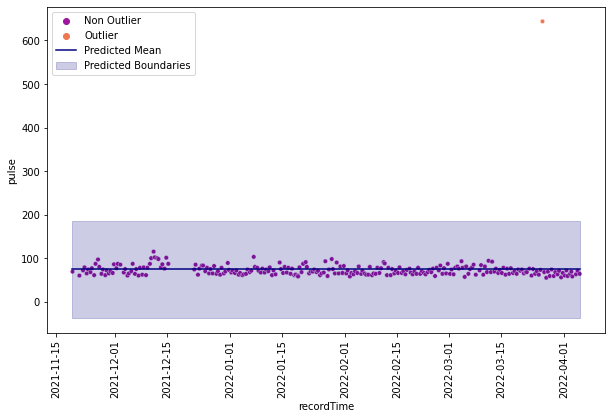

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_data.recordTime,y=pred_data.pulse,hue=pred_data.Outlier,palette='plasma',s=20)
X = np.array(data.recordTime)
plt.plot(X,mean_value,color='navy',label='Predicted Mean')
plt.fill_between(X,mean_value-3.00*std_value,mean_value+3.00*std_value,color='navy',alpha=0.2,label='Predicted Boundaries')
plt.xticks(rotation=90)
plt.legend()


In [42]:
pred_data[pred_data['Outlier']=='Outlier']


,recordTime,pulse,X,GPR Mean,GPR Upper Boundary,GPR Lower Boundary,Outlier
237,2022-03-26 05:35:00,644,126,74.161228,185.392933,-37.070478,Outlier
